<a href="https://colab.research.google.com/github/PabloRodMa/PROYECTO-FINAL/blob/main/PROYECTO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance ta pandas
!pip install pandas_datareader

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import yfinance as yf
import time

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import ta


# Paso 1: Obtener tickers del Dow Jones
def get_dow_tickers():
    url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
    tables = pd.read_html(url)
    for table in tables:
        if 'Symbol' in table.columns:
            return [t.replace('.', '-') for t in table['Symbol']]
    raise ValueError("No se encontró la columna 'Symbol'.")

dow_tickers = get_dow_tickers()
extra_tickers = ['GC=F', 'EURUSD=X', 'GBPUSD=X', 'JPY=X', '^VIX', 'CL=F', '^TNX', '^SPX', 'DX-Y.NYB', 'UUP', 'XLV', 'XLF','^DJI']
all_tickers = dow_tickers + extra_tickers

print(f"✅ Tickers obtenidos ({len(all_tickers)}): {all_tickers}")

# Crear carpeta si no existe
folder_path = "dow_data"
os.makedirs(folder_path, exist_ok=True)

# Paso 2: Descargar datos
start_date = "2015-01-02"
end_date = "2025-05-10"

for ticker in all_tickers:
    try:
        print(f"📥 Descargando datos para: {ticker}")
        data = yf.download(ticker, start=start_date, end=end_date)

        if data.empty:
            print(f"⚠️ Sin datos para {ticker}, se omite.")
            continue

        data.reset_index(inplace=True)
        file_path = os.path.join(folder_path, f"{ticker}.csv")
        data.to_csv(file_path, index=False)
        print(f"✅ Guardado: {file_path} | Última fecha: {data['Date'].iloc[-1].date()}")


        time.sleep(1)  # para evitar bloqueos

    except Exception as e:
        print(f"❌ Error al procesar {ticker}: {e}")

# Paso 3: Leer archivos CSV y formatear
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
dfs = []

for file in csv_files:
    try:
        ticker = os.path.basename(file).replace(".csv", "")
        df = pd.read_csv(file)

        if "Date" not in df.columns or "Open" not in df.columns:
            print(f"⚠️ Formato inválido en: {file}, se omite.")
            continue

        df["Date"] = pd.to_datetime(df["Date"])
        df["Ticker"] = ticker

        df = df[["Date", "Ticker", "Open", "High", "Low", "Close", "Volume"]].copy()

        # ✅ Versión robusta
        currency_tickers = ['GC=F']

        if ticker in currency_tickers:
          df["Volume"] = 0
        else:
          df["Volume"] = pd.to_numeric(df["Volume"], errors="coerce").fillna(0).astype(int)

        dfs.append(df)

    except Exception as e:
        print(f"Error procesando {file}: {str(e)}")
        continue


# Paso 4: Concatenar todo
final_df = pd.concat(dfs).sort_values(["Date", "Ticker"]).reset_index(drop=True)

# Guardar dataset final
final_df.to_csv("DowJones_ConExtras_10y.csv", index=False)
print("✅ Proceso completado. Registros combinados:", len(final_df))

# Si prefieres ordenar por fecha y luego por ticker (recomendado para mejor organización):
final_df = final_df.sort_values("Date")

print(final_df.head(50))
print(final_df.shape)
print(final_df.tail(50))

# Comprobamos que todos los datos de los tickers estan importados correctamente:
print(len(final_df['Ticker'].unique()))

✅ Tickers obtenidos (43): ['MMM', 'AXP', 'AMGN', 'AMZN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'NVDA', 'PG', 'CRM', 'SHW', 'TRV', 'UNH', 'VZ', 'V', 'WMT', 'GC=F', 'EURUSD=X', 'GBPUSD=X', 'JPY=X', '^VIX', 'CL=F', '^TNX', '^SPX', 'DX-Y.NYB', 'UUP', 'XLV', 'XLF', '^DJI']
📥 Descargando datos para: MMM


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/MMM.csv | Última fecha: 2025-05-09
📥 Descargando datos para: AXP


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/AXP.csv | Última fecha: 2025-05-09
📥 Descargando datos para: AMGN


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/AMGN.csv | Última fecha: 2025-05-09
📥 Descargando datos para: AMZN


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/AMZN.csv | Última fecha: 2025-05-09
📥 Descargando datos para: AAPL


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/AAPL.csv | Última fecha: 2025-05-09
📥 Descargando datos para: BA


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/BA.csv | Última fecha: 2025-05-09
📥 Descargando datos para: CAT


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/CAT.csv | Última fecha: 2025-05-09
📥 Descargando datos para: CVX


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/CVX.csv | Última fecha: 2025-05-09
📥 Descargando datos para: CSCO


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/CSCO.csv | Última fecha: 2025-05-09
📥 Descargando datos para: KO


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/KO.csv | Última fecha: 2025-05-09
📥 Descargando datos para: DIS


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/DIS.csv | Última fecha: 2025-05-09
📥 Descargando datos para: GS


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/GS.csv | Última fecha: 2025-05-09
📥 Descargando datos para: HD


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/HD.csv | Última fecha: 2025-05-09
📥 Descargando datos para: HON


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/HON.csv | Última fecha: 2025-05-09
📥 Descargando datos para: IBM


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/IBM.csv | Última fecha: 2025-05-09
📥 Descargando datos para: JNJ


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/JNJ.csv | Última fecha: 2025-05-09
📥 Descargando datos para: JPM


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/JPM.csv | Última fecha: 2025-05-09
📥 Descargando datos para: MCD


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/MCD.csv | Última fecha: 2025-05-09
📥 Descargando datos para: MRK


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/MRK.csv | Última fecha: 2025-05-09
📥 Descargando datos para: MSFT


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/MSFT.csv | Última fecha: 2025-05-09
📥 Descargando datos para: NKE


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/NKE.csv | Última fecha: 2025-05-09
📥 Descargando datos para: NVDA


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/NVDA.csv | Última fecha: 2025-05-09
📥 Descargando datos para: PG


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/PG.csv | Última fecha: 2025-05-09
📥 Descargando datos para: CRM


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/CRM.csv | Última fecha: 2025-05-09
📥 Descargando datos para: SHW


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/SHW.csv | Última fecha: 2025-05-09
📥 Descargando datos para: TRV


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/TRV.csv | Última fecha: 2025-05-09
📥 Descargando datos para: UNH


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/UNH.csv | Última fecha: 2025-05-09
📥 Descargando datos para: VZ


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/VZ.csv | Última fecha: 2025-05-09
📥 Descargando datos para: V


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/V.csv | Última fecha: 2025-05-09
📥 Descargando datos para: WMT


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/WMT.csv | Última fecha: 2025-05-09
📥 Descargando datos para: GC=F


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/GC=F.csv | Última fecha: 2025-05-09
📥 Descargando datos para: EURUSD=X


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/EURUSD=X.csv | Última fecha: 2025-05-09
📥 Descargando datos para: GBPUSD=X


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/GBPUSD=X.csv | Última fecha: 2025-05-09
📥 Descargando datos para: JPY=X


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/JPY=X.csv | Última fecha: 2025-05-09
📥 Descargando datos para: ^VIX


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/^VIX.csv | Última fecha: 2025-05-09
📥 Descargando datos para: CL=F


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/CL=F.csv | Última fecha: 2025-05-09
📥 Descargando datos para: ^TNX


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/^TNX.csv | Última fecha: 2025-05-09
📥 Descargando datos para: ^SPX


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/^SPX.csv | Última fecha: 2025-05-09
📥 Descargando datos para: DX-Y.NYB


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/DX-Y.NYB.csv | Última fecha: 2025-05-09
📥 Descargando datos para: UUP


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/UUP.csv | Última fecha: 2025-05-09
📥 Descargando datos para: XLV


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/XLV.csv | Última fecha: 2025-05-09
📥 Descargando datos para: XLF


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/XLF.csv | Última fecha: 2025-05-09
📥 Descargando datos para: ^DJI


/tmp/ipython-input-2-3623553123.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: dow_data/^DJI.csv | Última fecha: 2025-05-09
✅ Proceso completado. Registros combinados: 112284
         Date    Ticker                 Open                 High  \
0  2015-01-02      AAPL   24.746229620306494    24.75733822078495   
24 2015-01-02       MMM    97.35166872971043    97.57035127605148   
25 2015-01-02       MRK   39.507701310767004    39.90126121130876   
26 2015-01-02      MSFT    39.91315626644015   40.563261964442404   
27 2015-01-02       NKE    42.53170984663578    42.70791309684778   
28 2015-01-02      NVDA  0.48306554555892944   0.4866651649418316   
29 2015-01-02        PG    67.73986692494218    67.85918250415551   
30 2015-01-02       SHW    79.20402148705634    80.03780996813477   
32 2015-01-02       UNH    86.19648128807316    87.14761720717019   
23 2015-01-02       MCD    72.16514662374446    72.83213778067741   
33 2015-01-02       UUP   20.838030087173994    20.90714454650879   
35 2015-01-02        VZ   27.490433850337464   27.62496123760247

In [3]:
# 🔹 QUITA filas con fechas nulas o mal formateadas
final_df = final_df[final_df["Date"].notna()].copy()

# 🔹 OPCIONAL: guarda el dataset limpio
final_df.to_csv("datos_limpios_hasta_2025-05-09.csv", index=False)
print(f"✅ Datos limpios guardados. Última fecha: {final_df['Date'].max().date()}")

print(final_df.tail(42))


✅ Datos limpios guardados. Última fecha: 2025-05-09
             Date    Ticker                Open                High  \
112222 2025-05-09       MMM  140.57151816322286  141.92489037003529   
112223 2025-05-09       MRK   77.18717452041082   77.67231499077468   
112224 2025-05-09      MSFT  439.19371771814804  439.93235195021686   
112225 2025-05-09       NKE  58.749570011217145   58.98798725094344   
112226 2025-05-09      NVDA  117.34184743589364   118.2217911942619   
112227 2025-05-09        PG  158.02000427246094   159.1300048828125   
112228 2025-05-09       SHW   351.7096128582116  353.00675933215217   
112238 2025-05-09      ^SPX    5679.64990234375    5691.68994140625   
112230 2025-05-09       UNH    382.951513682806   383.8252853099375   
112231 2025-05-09       UUP  27.649999618530273   27.68000030517578   
112232 2025-05-09         V  351.24663014231794   353.2133649760644   
112233 2025-05-09        VZ   43.52000045776367  43.880001068115234   
112234 2025-05-09       W

In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Tickers usados previamente (ajusta si alguno no es compatible con yfinance)
tickers = [
    "MMM", "MRK", "MSFT", "NKE", "NVDA", "PG", "SHW", "^SPX", "UNH", "UUP",
    "V", "VZ", "WMT", "XLF", "XLV", "^DJI", "KO", "TRV", "JPY=X", "DIS",
    "JNJ", "^TNX", "AAPL", "AMGN", "AMZN", "AXP", "BA", "CAT", "CL=F",
    "CRM", "CSCO", "CVX", "DX-Y.NYB", "EURUSD=X", "GBPUSD=X", "GC=F",
    "GS", "HD", "HON", "IBM", "JPM", "^VIX"
]

# Descargar nuevos datos
start_date = "2025-05-12"
end_date = "2025-06-20"

# Descarga en un solo DataFrame
new_data = yf.download(tickers, start=start_date, end=end_date, group_by='date', auto_adjust=False)

# Transformar en formato largo
data_list = []
for ticker in tickers:
    if ticker in new_data.columns.levels[0]:
        df = new_data[ticker].copy()
        df['Ticker'] = ticker
        df['Date'] = df.index
        data_list.append(df.reset_index(drop=True))

new_df = pd.concat(data_list, ignore_index=True)

# Renombrar columnas para que coincidan con final_df
new_df = new_df.rename(columns={
    'Open': 'Open',
    'High': 'High',
    'Low': 'Low',
    'Close': 'Close',
    'Volume': 'Volume'
})[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Cargar datos anteriores
final_df = pd.read_csv("datos_limpios_hasta_2025-05-09.csv")

# Asegurarse de que Date sea datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Concatenar
final_df = pd.concat([final_df, new_df], ignore_index=True)

# Eliminar duplicados si los hay
final_df = final_df.drop_duplicates(subset=['Date', 'Ticker'])

# Guardar archivo actualizado
final_df.to_csv("datos_actualizados_hasta_2026-06-12.csv", index=False)
print(f"✅ Datos actualizados guardados. Última fecha: {final_df['Date'].max().date()}")

print(final_df.tail(42))


[*********************100%***********************]  42 of 42 completed


✅ Datos actualizados guardados. Última fecha: 2025-06-19
             Date Ticker        Open        High         Low       Close  \
113417 2025-06-03    JPM  263.730011  266.579987  262.880005  266.269989   
113418 2025-06-04    JPM  265.920013  267.119995  264.179993  264.220001   
113419 2025-06-05    JPM  264.739990  264.739990  260.309998  261.950012   
113420 2025-06-06    JPM  264.329987  266.649994  264.260010  265.730011   
113421 2025-06-09    JPM  266.000000  267.899994  263.350006  266.739990   
113422 2025-06-10    JPM  265.880005  268.899994  265.850006  268.600006   
113423 2025-06-11    JPM  268.679993  269.619995  265.790009  268.149994   
113424 2025-06-12    JPM  266.859985  268.290009  265.140015  268.239990   
113425 2025-06-13    JPM  265.079987  267.019989  262.709991  264.950012   
113426 2025-06-16    JPM  267.000000  271.730011  266.850006  270.359985   
113427 2025-06-17    JPM  268.170013  270.589996  267.799988  269.519989   
113428 2025-06-18    JPM  270.0

In [5]:
# Ordenar por fecha
final_df = final_df.sort_values(by='Date').reset_index(drop=True)
print(final_df.tail(42))

             Date    Ticker        Open        High         Low       Close  \
113417 2025-06-19       JPM         NaN         NaN         NaN         NaN   
113418 2025-06-19         V         NaN         NaN         NaN         NaN   
113419 2025-06-19       HON         NaN         NaN         NaN         NaN   
113420 2025-06-19        KO         NaN         NaN         NaN         NaN   
113421 2025-06-19      ^DJI         NaN         NaN         NaN         NaN   
113422 2025-06-19       XLV         NaN         NaN         NaN         NaN   
113423 2025-06-19       XLF         NaN         NaN         NaN         NaN   
113424 2025-06-19       WMT         NaN         NaN         NaN         NaN   
113425 2025-06-19        VZ         NaN         NaN         NaN         NaN   
113426 2025-06-19       UUP         NaN         NaN         NaN         NaN   
113427 2025-06-19       TRV         NaN         NaN         NaN         NaN   
113428 2025-06-19       UNH         NaN         NaN 

CODIGO PABLO MORENA VARIABLES

In [6]:
final_df['Close'] = pd.to_numeric(final_df['Close'], errors='coerce')

In [7]:
#Calcular las medias móviles exponenciales (EMA)
ema_12 = final_df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = final_df['Close'].ewm(span=26, adjust=False).mean()

print(ema_12)

0          24.288584
1          22.925109
2          31.685667
3          44.296675
4          48.216297
             ...    
113454    167.974616
113455    167.974616
113456    167.974616
113457    167.974616
113458    167.974616
Name: Close, Length: 113459, dtype: float64


In [8]:
def calcular_macd(grupo):
    close = grupo['Close']
    ema_12 = close.ewm(span=12, adjust=False).mean()
    ema_26 = close.ewm(span=26, adjust=False).mean()
    ema_50 = close.ewm(span=50, adjust=False).mean()
    ema_150 = close.ewm(span=150, adjust=False).mean()
    macd = ema_12 - ema_26
    signal = macd.ewm(span=9, adjust=False).mean()
    grupo["MACD"] = macd
    grupo["MACD_Signal"] = signal
    grupo["MACD_Hist"] = macd - signal
    grupo["EMA_50"] = ema_50
    grupo["EMA_150"] = ema_150

    return grupo

# Aplicar por ticker
final_df = final_df.groupby("Ticker").apply(calcular_macd).reset_index(drop=True)

def interpretar_emas(ema_50, ema_150):
    if pd.isna(ema_50) or pd.isna(ema_150):
        return 'Sin datos'
    elif ema_50 > ema_150:
        return 'Tendencia Alcista'
    elif ema_50 < ema_150:
        return 'Tendencia Bajista'
    else:
        return 'Neutral'

final_df['EMA_Signal'] = final_df.apply(lambda row: interpretar_emas(row['EMA_50'], row['EMA_150']), axis=1)

/tmp/ipython-input-8-2819583313.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("Ticker").apply(calcular_macd).reset_index(drop=True)


In [9]:
def calcular_rsi(df, period=14, column='Close'):
    delta = df[column].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss.replace(to_replace=0, method='ffill')
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi
    return df

#Aplicar por ticker
final_df = final_df.groupby("Ticker").apply(calcular_rsi).reset_index(drop=True)

def interpretar_rsi(rsi):
    if pd.isna(rsi):
        return 'Sin datos'
    elif rsi > 70:
        return 'Sobrecompra'
    elif rsi < 30:
        return 'Sobreventa'
    else:
        return 'Neutral'

final_df['RSI_Signal'] = final_df['RSI'].apply(interpretar_rsi)

/tmp/ipython-input-9-2007162344.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rs = avg_gain / avg_loss.replace(to_replace=0, method='ffill')
/tmp/ipython-input-9-2007162344.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rs = avg_gain / avg_loss.replace(to_replace=0, method='ffill')
/tmp/ipython-input-9-2007162344.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rs = avg_gain / avg_loss.replace(to_replace=0, method='ffill')
/tmp/ipython-input-9-2007162344.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rs = avg_gain / avg_loss.replace(to_replace=0, method='ffill')
/tmp/ipython-input-9-2007162344.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rs 

In [10]:
print(final_df["RSI"].isna().sum()) #Existen 546 datos NaN porque el period es 14 y esta filtrado según los Tickers. Por lo que 13 valores vacíos por 42 tickers hacen 546 valores Nan

559


In [11]:
# Eliminar columnas duplicadas generadas por nombres repetidos (como Close.1, High.1, etc.)
columnas_a_borrar = [col for col in final_df.columns if any(sufijo in col for sufijo in [".1", ".2", ".3"])]
final_df.drop(columns=columnas_a_borrar, inplace=True)
# Borrar columnas con sufijos numéricos no deseados (del tipo .4, .5, ..., .42)
columnas_a_borrar = [col for col in final_df.columns if any(col.endswith(f".{i}") for i in range(1, 43))]
final_df.drop(columns=columnas_a_borrar, inplace=True)

print(f"🧹 Columnas eliminadas: {columnas_a_borrar}")

print(f"🧹 Columnas eliminadas: {columnas_a_borrar}")

for i in final_df.columns:
  print(i)

🧹 Columnas eliminadas: []
🧹 Columnas eliminadas: []
Date
Ticker
Open
High
Low
Close
Volume
MACD
MACD_Signal
MACD_Hist
EMA_50
EMA_150
EMA_Signal
RSI
RSI_Signal


In [12]:
print(type(final_df))

<class 'pandas.core.frame.DataFrame'>


In [13]:
print(final_df.head())

        Date Ticker       Open       High        Low      Close       Volume  \
0 2015-01-02   AAPL  24.746230  24.757338  23.848709  24.288584  212818400.0   
1 2015-01-05   AAPL  24.057533  24.137511  23.417718  23.604330  257142000.0   
2 2015-01-06   AAPL  23.668756  23.866477  23.244433  23.606552  263188400.0   
3 2015-01-07   AAPL  23.815387  24.037545  23.704307  23.937574  160423600.0   
4 2015-01-08   AAPL  24.266361  24.915063  24.148616  24.857302  237458000.0   

       MACD  MACD_Signal  MACD_Hist     EMA_50    EMA_150         EMA_Signal  \
0  0.000000     0.000000   0.000000  24.288584  24.288584            Neutral   
1 -0.054584    -0.010917  -0.043667  24.261750  24.279521  Tendencia Bajista   
2 -0.096551    -0.028044  -0.068507  24.236056  24.270607  Tendencia Bajista   
3 -0.101923    -0.042820  -0.059104  24.224351  24.266196  Tendencia Bajista   
4 -0.031603    -0.040576   0.008973  24.249173  24.274025  Tendencia Bajista   

   RSI RSI_Signal  
0  NaN  Sin datos 

In [14]:
for i in final_df.columns:
  print(f"{i}: {final_df[i].isna().sum()}")

Date: 0
Ticker: 0
Open: 77
High: 77
Low: 77
Close: 77
Volume: 77
MACD: 0
MACD_Signal: 0
MACD_Hist: 0
EMA_50: 0
EMA_150: 0
EMA_Signal: 0
RSI: 559
RSI_Signal: 0


In [15]:
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [16]:
final_df = final_df.sort_values(by='Date').reset_index(drop=True)

In [17]:
print(final_df.head())

        Date Ticker       Open       High        Low      Close       Volume  \
0 2015-01-02   AAPL  24.746230  24.757338  23.848709  24.288584  212818400.0   
1 2015-01-02    CVX  71.178271  72.051822  70.680923  71.784019    5898800.0   
2 2015-01-02    UUP  20.838030  20.907145  20.829391  20.907145    1887600.0   
3 2015-01-02   CSCO  20.236738  20.425595  19.888079  20.055145   22926500.0   
4 2015-01-02      V  61.189594  61.972526  60.982822  61.570602    8389600.0   

   MACD  MACD_Signal  MACD_Hist     EMA_50    EMA_150 EMA_Signal  RSI  \
0   0.0          0.0        0.0  24.288584  24.288584    Neutral  NaN   
1   0.0          0.0        0.0  71.784019  71.784019    Neutral  NaN   
2   0.0          0.0        0.0  20.907145  20.907145    Neutral  NaN   
3   0.0          0.0        0.0  20.055145  20.055145    Neutral  NaN   
4   0.0          0.0        0.0  61.570602  61.570602    Neutral  NaN   

  RSI_Signal  
0  Sin datos  
1  Sin datos  
2  Sin datos  
3  Sin datos  
4  Si

CODIGO PABLO RODADO ADX Y ATR

In [18]:
adx_list = []

for ticker in final_df['Ticker'].unique():
    df_ticker = final_df[final_df['Ticker'] == ticker].copy()
    df_ticker.sort_values("Date", inplace=True)

    # Asegurarse de que los valores sean numéricos
    for col in ['High', 'Low', 'Close']:
        df_ticker[col] = pd.to_numeric(df_ticker[col], errors='coerce')

    # Eliminar filas con valores NaN
    df_ticker.dropna(subset=['High', 'Low', 'Close'], inplace=True)

    # Calcular ADX
    adx = ta.trend.ADXIndicator(
        high=df_ticker['High'],
        low=df_ticker['Low'],
        close=df_ticker['Close'],
        window=14,
        fillna=True
    )

    df_ticker['ADX'] = adx.adx()
    adx_list.append(df_ticker)



adx_list = []

for ticker in final_df['Ticker'].unique():
    df_ticker = final_df[final_df['Ticker'] == ticker].copy()
    df_ticker.sort_values("Date", inplace=True)

    # Asegurar que columnas clave sean numéricas
    for col in ['High', 'Low', 'Close']:
        df_ticker[col] = pd.to_numeric(df_ticker[col], errors='coerce')

    # Eliminar filas con datos faltantes
    df_ticker.dropna(subset=['High', 'Low', 'Close'], inplace=True)

    # Calcular ADX
    adx_indicator = ta.trend.ADXIndicator(
        high=df_ticker['High'],
        low=df_ticker['Low'],
        close=df_ticker['Close'],
        window=14,
        fillna=True
    )

    df_ticker['ADX'] = adx_indicator.adx()
    adx_list.append(df_ticker)

# Concatenar todos los tickers con su ADX
final_df = pd.concat(adx_list).sort_values(['Date', 'Ticker']).reset_index(drop=True)

# Guardar en un nuevo archivo si deseas
final_df.to_csv("DowJones_ConExtras_10y_ADX.csv", index=False)
print("✅ Columna ADX añadida al dataset final.")



def categorize_adx(adx_value):
    if adx_value < 20:
        return 'No Trend'
    elif adx_value < 30:
        return 'Weak Trend'
    else:
        return 'Strong Trend'

final_df['Trend_Strength'] = final_df['ADX'].apply(categorize_adx)


print(final_df.tail(50))


✅ Columna ADX añadida al dataset final.
             Date    Ticker          Open          High           Low  \
113332 2025-06-17       XLV    135.100006    135.410004    133.289993   
113333 2025-06-17      ^DJI  42358.621094  42530.828125  42132.648438   
113334 2025-06-17      ^SPX   6012.149902   6023.250000   5974.799805   
113335 2025-06-17      ^TNX      4.403000      4.442000      4.381000   
113336 2025-06-17      ^VIX     20.530001     21.790001     19.549999   
113337 2025-06-18      AAPL    195.940002    197.570007    195.070007   
113338 2025-06-18      AMGN    290.790009    291.869995    286.600006   
113339 2025-06-18      AMZN    215.089996    217.960007    212.339996   
113340 2025-06-18       AXP    292.079987    299.239990    292.079987   
113341 2025-06-18        BA    199.000000    201.059998    196.800003   
113342 2025-06-18       CAT    357.130005    364.230011    356.959991   
113343 2025-06-18      CL=F     75.610001     76.070000     72.940002   
113344 2025

In [19]:
atr_list = []

for ticker in final_df['Ticker'].unique():
    df_ticker = final_df[final_df['Ticker'] == ticker].copy()
    df_ticker.sort_values("Date", inplace=True)

    # Asegurar que columnas sean numéricas
    for col in ['High', 'Low', 'Close']:
        df_ticker[col] = pd.to_numeric(df_ticker[col], errors='coerce')

    # Eliminar filas con datos faltantes
    df_ticker.dropna(subset=['High', 'Low', 'Close'], inplace=True)

    # Calcular ATR
    atr_indicator = ta.volatility.AverageTrueRange(
        high=df_ticker['High'],
        low=df_ticker['Low'],
        close=df_ticker['Close'],
        window=14,
        fillna=True
    )

    df_ticker['ATR'] = atr_indicator.average_true_range()
    atr_list.append(df_ticker)

# Concatenar los resultados
final_df = pd.concat(atr_list).sort_values(['Date', 'Ticker']).reset_index(drop=True)

# Guardar el nuevo archivo con ATR incluido
final_df.to_csv("DowJones_ConExtras_10y_ATR.csv", index=False)
print("✅ ATR añadido correctamente a final_df.")

# Añadir una media móvil de ATR (por ejemplo, de 30 días)
final_df['ATR_Mean30'] = final_df.groupby('Ticker')['ATR'].transform(lambda x: x.rolling(30).mean())

# Crear una columna booleana para ATR alto
final_df['ATR_Alto'] = final_df['ATR'] > final_df['ATR_Mean30'] * 1.5  # puedes ajustar este umbral

# Ver qué porcentaje de veces se considera "alto"
print(final_df['ATR_Alto'].mean())

print(final_df.tail(50))

✅ ATR añadido correctamente a final_df.
0.01682806794729322
             Date    Ticker          Open          High           Low  \
113332 2025-06-17       XLV    135.100006    135.410004    133.289993   
113333 2025-06-17      ^DJI  42358.621094  42530.828125  42132.648438   
113334 2025-06-17      ^SPX   6012.149902   6023.250000   5974.799805   
113335 2025-06-17      ^TNX      4.403000      4.442000      4.381000   
113336 2025-06-17      ^VIX     20.530001     21.790001     19.549999   
113337 2025-06-18      AAPL    195.940002    197.570007    195.070007   
113338 2025-06-18      AMGN    290.790009    291.869995    286.600006   
113339 2025-06-18      AMZN    215.089996    217.960007    212.339996   
113340 2025-06-18       AXP    292.079987    299.239990    292.079987   
113341 2025-06-18        BA    199.000000    201.059998    196.800003   
113342 2025-06-18       CAT    357.130005    364.230011    356.959991   
113343 2025-06-18      CL=F     75.610001     76.070000     72.9

In [20]:
atr_altos = final_df[final_df['ATR_Alto'] == True]
print(atr_altos[['Date', 'Ticker', 'ATR', 'ATR_Mean30','ATR_Alto']].head())

           Date    Ticker       ATR  ATR_Mean30  ATR_Alto
1219 2015-02-12  EURUSD=X  0.013763    0.008619      True
1220 2015-02-12  GBPUSD=X  0.013638    0.007949      True
1228 2015-02-12     JPY=X  1.285520    0.734875      True
1250 2015-02-13      AAPL  0.612082    0.393575      True
1251 2015-02-13      AMGN  3.144215    1.967975      True


In [21]:
print (final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113382 entries, 0 to 113381
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            113382 non-null  datetime64[ns]
 1   Ticker          113382 non-null  object        
 2   Open            113382 non-null  float64       
 3   High            113382 non-null  float64       
 4   Low             113382 non-null  float64       
 5   Close           113382 non-null  float64       
 6   Volume          113382 non-null  float64       
 7   MACD            113382 non-null  float64       
 8   MACD_Signal     113382 non-null  float64       
 9   MACD_Hist       113382 non-null  float64       
 10  EMA_50          113382 non-null  float64       
 11  EMA_150         113382 non-null  float64       
 12  EMA_Signal      113382 non-null  object        
 13  RSI             112823 non-null  float64       
 14  RSI_Signal      113382 non-null  obj

In [22]:
!pip install pandas_datareader

In [23]:
import pandas as pd
import pandas_datareader.data as web
import datetime

# Rango de fechas
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2025, 5, 25)

# Descargar CPI y NFP desde FRED
cpi = web.DataReader('CPIAUCSL', 'fred', start, end).rename(columns={'CPIAUCSL': 'CPI'})
nfp = web.DataReader('PAYEMS', 'fred', start, end).rename(columns={'PAYEMS': 'NFP'})

# Resamplear diario con forward fill
cpi = cpi.resample('D').ffill().reset_index()
nfp = nfp.resample('D').ffill().reset_index()

# Guardar a CSV (opcional)
cpi.to_csv('cpi.csv', index=False)
nfp.to_csv('nfp.csv', index=False)

# Cargar final_df (asegúrate de tenerlo en memoria)
# Si no lo tienes cargado: final_df = pd.read_csv('DowJones_ConExtras_10y.csv')

# Asegurarte de que 'Date' es datetime en todos los DataFrames
final_df['Date'] = pd.to_datetime(final_df['Date'])
cpi['DATE'] = pd.to_datetime(cpi['DATE'])  # Así es como FRED exporta la columna
nfp['DATE'] = pd.to_datetime(nfp['DATE'])

# Renombrar 'DATE' a 'Date' para mergear correctamente
cpi.rename(columns={'DATE': 'Date'}, inplace=True)
nfp.rename(columns={'DATE': 'Date'}, inplace=True)

# Hacer merge
final_df = final_df.merge(cpi, on='Date', how='left')
final_df = final_df.merge(nfp, on='Date', how='left')

# Unir CPI y NFP antes del merge
macro_df = pd.merge(cpi, nfp, on='Date', how='inner')

# Hacer merge único con final_df
final_df = final_df.merge(macro_df, on='Date', how='left')

# Verificar resultado
print(final_df.tail(42))

             Date    Ticker          Open          High           Low  \
113340 2025-06-18       AXP    292.079987    299.239990    292.079987   
113341 2025-06-18        BA    199.000000    201.059998    196.800003   
113342 2025-06-18       CAT    357.130005    364.230011    356.959991   
113343 2025-06-18      CL=F     75.610001     76.070000     72.940002   
113344 2025-06-18       CRM    264.799988    265.079987    257.470001   
113345 2025-06-18      CSCO     65.690002     66.339996     65.379997   
113346 2025-06-18       CVX    149.440002    150.169998    147.699997   
113347 2025-06-18       DIS    117.879997    118.750000    116.839996   
113348 2025-06-18  DX-Y.NYB     98.870003     99.010002     98.480003   
113349 2025-06-18  EURUSD=X      1.148264      1.153004      1.148237   
113350 2025-06-18  GBPUSD=X      1.343075      1.347709      1.342787   
113351 2025-06-18      GC=F   3385.300049   3391.899902   3365.100098   
113352 2025-06-18        GS    624.510010    639.88

In [24]:
# Eliminar las columnas _y
final_df = final_df.drop(columns=['CPI_y', 'NFP_y'])

# Renombrar las columnas _x quitando el sufijo
final_df = final_df.rename(columns={'CPI_x': 'CPI', 'NFP_x': 'NFP'})

# Verificar resultado
print(final_df[['Date', 'Ticker', 'CPI', 'NFP']].head())

        Date Ticker      CPI       NFP
0 2015-01-02   AAPL  234.747  140568.0
1 2015-01-02   AMGN  234.747  140568.0
2 2015-01-02   AMZN  234.747  140568.0
3 2015-01-02    AXP  234.747  140568.0
4 2015-01-02     BA  234.747  140568.0


In [25]:
print(final_df.tail())

             Date    Ticker        Open        High         Low       Close  \
113377 2025-06-18      ^TNX    4.365000    4.399000    4.346000    4.397000   
113378 2025-06-18      ^VIX   20.900000   21.580000   19.590000   20.139999   
113379 2025-06-19  EURUSD=X    1.147750    1.148686    1.144846    1.147750   
113380 2025-06-19  GBPUSD=X    1.341508    1.345008    1.338384    1.341652   
113381 2025-06-19     JPY=X  144.955002  145.764999  144.748001  144.955002   

        Volume      MACD  MACD_Signal  MACD_Hist  ...         EMA_Signal  \
113377     0.0  0.001753     0.012385  -0.010633  ...  Tendencia Alcista   
113378     0.0 -0.580760    -1.182567   0.601807  ...  Tendencia Alcista   
113379     0.0  0.006858     0.006723   0.000135  ...  Tendencia Alcista   
113380     0.0  0.004367     0.006744  -0.002377  ...  Tendencia Alcista   
113381     0.0  0.011953    -0.176594   0.188547  ...  Tendencia Bajista   

              RSI RSI_Signal        ADX Trend_Strength       ATR ATR

# CODIGO PARA AÑADIR VARIABLE CATEGORICA DIA DE LA SEMANA (LUNES - VIERNES) - @GINO

In [26]:
# Comprobamos que todos los datos de los tickers estan importados correctamente:
print(len(final_df['Ticker'].unique()))

# Asegúrate de que la columna "Date" está en formato datetime
final_df["Date"] = pd.to_datetime(final_df["Date"])

# Agregar columna numérica que representa el día de la semana (lunes=0, domingo=6)
final_df["DayOfWeek"] = final_df["Date"].dt.weekday

# Filtrar solo días de lunes (0) a viernes (4)
final_df = final_df[final_df["DayOfWeek"] <= 4].reset_index(drop=True)

# Verificamos que se haya agregado correctamente
print(final_df[["Date", "DayOfWeek"]].head(10))

43
        Date  DayOfWeek
0 2015-01-02          4
1 2015-01-02          4
2 2015-01-02          4
3 2015-01-02          4
4 2015-01-02          4
5 2015-01-02          4
6 2015-01-02          4
7 2015-01-02          4
8 2015-01-02          4
9 2015-01-02          4


# ANALISIS EXPLORATORIO DE DATOS


## Each variable is explained below

Hasta aqui hemos recogido todos los datos del data set y vamos a realizar una explicacion de cada Ticker = Empresa y de cada variable:


✅ Tickers del Dataset — Explicación Muy Breve
AAPL – Apple Inc., tecnología y productos electrónicos.

AMGN – Amgen Inc., biotecnología.

AMZN – Amazon.com Inc., e-commerce y cloud.

AXP – American Express, servicios financieros.

BA – Boeing Co., industria aeroespacial.

CAT – Caterpillar Inc., maquinaria pesada.

CL=F – Futuros de petróleo crudo WTI.

CRM – Salesforce Inc., software de gestión de relaciones con clientes.

CSCO – Cisco Systems Inc., redes y telecomunicaciones.

CVX – Chevron Corp., petróleo y energía.

DIS – Walt Disney Co., entretenimiento.

DX-Y.NYB – Índice del dólar estadounidense (ICE).

EURUSD=X – Tasa de cambio euro/dólar.

GBPUSD=X – Tasa de cambio libra esterlina/dólar.

GC=F – Futuros del oro.

GS – Goldman Sachs Group Inc., banca de inversión.

HD – Home Depot Inc., productos para el hogar.

HON – Honeywell International, automatización e industria.

IBM – International Business Machines, tecnología y servicios.

JNJ – Johnson & Johnson, salud y farmacéutica.

JPM – JPMorgan Chase & Co., banca global.

JPY=X – Tasa de cambio yen japonés/dólar.

KO – Coca-Cola Co., bebidas.

MCD – McDonald's Corp., comida rápida.

MMM – 3M Co., productos industriales y de consumo.

MRK – Merck & Co., farmacéutica.

MSFT – Microsoft Corp., software y tecnología.

NKE – Nike Inc., ropa y calzado deportivo.

NVDA – NVIDIA Corp., chips y tecnología gráfica.

PG – Procter & Gamble, productos de consumo.

SHW – Sherwin-Williams, pinturas y recubrimientos.

TRV – Travelers Companies Inc., seguros.

UNH – UnitedHealth Group, seguros y servicios médicos.

UUP – ETF del índice del dólar estadounidense.

V – Visa Inc., pagos electrónicos.

VZ – Verizon Communications, telecomunicaciones.

WMT – Walmart Inc., retail y supermercados.

XLF – ETF del sector financiero (S&P).

XLV – ETF del sector salud (S&P).

^SPX – Índice S&P 500.

^TNX – Rentabilidad del bono del Tesoro a 10 años (EE.UU.).

^VIX – Índice de volatilidad del mercado (miedo).

^DJI - Indice del Mercado Industrial EEUU (DOW JONES)



**📊 Descripción de las variables**


🔹 Datos del mercado
Date: Fecha del dato.

Ticker: Símbolo bursátil de la empresa.

Open: Precio de apertura del activo ese día.

High: Precio máximo alcanzado durante la jornada.

Low: Precio mínimo registrado durante el día.

Close: Precio final de cotización al cierre del mercado.

Volume: Volumen de acciones negociadas ese día.



📈 Indicadores Técnicos
MACD: Diferencia entre dos medias móviles exponenciales (normalmente 12 y 26 días). Indica el impulso de la tendencia.

MACD_Signal: Media móvil del MACD (normalmente de 9 días). Sirve como señal de entrada/salida.

MACD_Hist: Diferencia entre MACD y su línea de señal. Mide la fuerza de la señal.

EMA_50: Media móvil exponencial de 50 días. Indica la tendencia de corto/medio plazo.

EMA_150: Media móvil exponencial de 150 días. Indica la tendencia de medio/largo plazo.

RSI: Índice de Fuerza Relativa. Oscila entre 0 y 100. Valores >70 indican sobrecompra, <30 indican sobreventa.

RSI_Signal: Interpretación categórica del RSI (por ejemplo: "Sobrecomprado", "Neutral", "Sobrevendido").

ADX: Índice de Dirección Promedio. Mide la fuerza de la tendencia. >25 indica una tendencia fuerte.

Trend_Strength: Clasificación del ADX en categorías como "Tendencia fuerte" o "No trend".

ATR: Rango Verdadero Promedio. Indica la volatilidad promedio de los precios.

ATR_Mean30: Media de 30 días del ATR. Sirve como referencia para detectar si la volatilidad actual es alta.

ATR_Alto: Variable binaria que indica si el ATR está por encima de su media de 30 días (1 = alta volatilidad).




🌍 Datos Macroeconómicos
CPI: Índice de Precios al Consumidor. Representa la inflación en EE. UU.

NFP: Nóminas no agrícolas. Representa la creación de empleo en sectores no agrícolas, un indicador clave del mercado laboral.


🧩 Variables derivadas
DayOfWeek: Día de la semana correspondiente a cada fecha (útil para análisis estacional o patrones semanales).


EMA_Signal: Señal de tendencia basada en la relación entre EMA_50 y EMA_150 (por ejemplo: "Alcista", "Bajista", "Neutral").

# Here we will start the actual EDA

In [27]:
print(final_df.shape)


# Verificar estructura resultante
print("Columnas actualizadas:")
print(final_df.columns.tolist())
print("\nTotal de columnas:", len(final_df.columns))

(113382, 23)
Columnas actualizadas:
['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'MACD_Signal', 'MACD_Hist', 'EMA_50', 'EMA_150', 'EMA_Signal', 'RSI', 'RSI_Signal', 'ADX', 'Trend_Strength', 'ATR', 'ATR_Mean30', 'ATR_Alto', 'CPI', 'NFP', 'DayOfWeek']

Total de columnas: 23


We observe a shape of 112k datapoints and 23 variables.

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113382 entries, 0 to 113381
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            113382 non-null  datetime64[ns]
 1   Ticker          113382 non-null  object        
 2   Open            113382 non-null  float64       
 3   High            113382 non-null  float64       
 4   Low             113382 non-null  float64       
 5   Close           113382 non-null  float64       
 6   Volume          113382 non-null  float64       
 7   MACD            113382 non-null  float64       
 8   MACD_Signal     113382 non-null  float64       
 9   MACD_Hist       113382 non-null  float64       
 10  EMA_50          113382 non-null  float64       
 11  EMA_150         113382 non-null  float64       
 12  EMA_Signal      113382 non-null  object        
 13  RSI             112823 non-null  float64       
 14  RSI_Signal      113382 non-null  obj

It appears we have detected null values inside a couple variables, such as:

> [RSI, ATR_Mean30, CPI and NFP]



In [29]:
# Analyze where are the null values, and how many are there:
print(final_df.isnull().sum())

Date                 0
Ticker               0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
MACD                 0
MACD_Signal          0
MACD_Hist            0
EMA_50               0
EMA_150              0
EMA_Signal           0
RSI                559
RSI_Signal           0
ADX                  0
Trend_Strength       0
ATR                  0
ATR_Mean30        1247
ATR_Alto             0
CPI               1399
NFP               1399
DayOfWeek            0
dtype: int64


> RSI has half of the null values of the other 3 variables

> ATR_Mean30, CPI and NFP have similar null values, we should check them to understand a little bit more.

# Analysis of null values

## RSI

In [30]:
rsi_missing = final_df['RSI'].isnull().sum()
rsi_total = len(final_df)
print(f"RSI: {rsi_missing} missing out of {rsi_total} ({rsi_missing/rsi_total:.2%})")

RSI: 559 missing out of 113382 (0.49%)


> There is a total of 559 missing values for the RSI, which constitutes a 0.5% of the total data. We will proceed to visualize where the null values are located

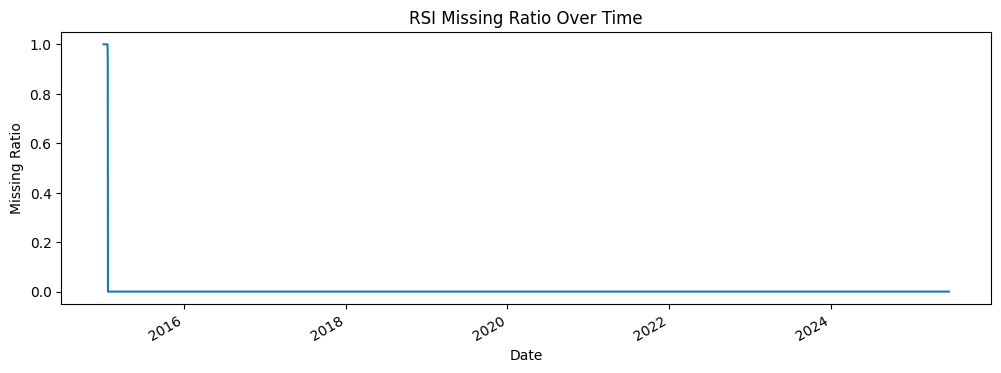

In [31]:
import matplotlib.pyplot as plt

final_df['RSI_missing'] = final_df['RSI'].isnull()
final_df.groupby('Date')['RSI_missing'].mean().plot(figsize=(12, 4), title='RSI Missing Ratio Over Time')
plt.ylabel('Missing Ratio')
plt.show()

final_df.drop(columns=['RSI_missing'], inplace=True)

> We can make the observation that all the null values are concentrated in the year 2015 onwards. We know the year because that's where our data starts. And the null values end before it reaches 2016.

> We can, then, conclude that the null values of the RSI are a product of the RSI itself. Since it takes past price data (specifically 14 days for the default option) it is correct to display NaN values, as it has to wait 14 days to start generating them.

> We will now check where are those NaN values located:

In [32]:
rsi_missing_by_ticker = final_df[final_df['RSI'].isnull()]['Ticker'].value_counts()
print(rsi_missing_by_ticker.head(43))

Ticker
AAPL        13
AMGN        13
AMZN        13
AXP         13
BA          13
CAT         13
CL=F        13
CRM         13
CSCO        13
CVX         13
DIS         13
DX-Y.NYB    13
EURUSD=X    13
GBPUSD=X    13
GC=F        13
GS          13
HD          13
HON         13
IBM         13
JNJ         13
JPM         13
JPY=X       13
KO          13
MCD         13
MMM         13
MRK         13
MSFT        13
NKE         13
NVDA        13
PG          13
SHW         13
TRV         13
UNH         13
UUP         13
V           13
VZ          13
WMT         13
XLF         13
XLV         13
^DJI        13
^SPX        13
^TNX        13
^VIX        13
Name: count, dtype: int64


It appears we were right about the RSI data missing due to its lagging nature. For now, we will focus on studying the rest of the null values.

## ATR Mean_30

In [33]:
atrmean30_missing = final_df['ATR_Mean30'].isnull().sum()
atrmean30_total = len(final_df)
print(f"ATR Mean_30: {atrmean30_missing} missing out of {atrmean30_total} ({atrmean30_missing/atrmean30_total:.2%})")

ATR Mean_30: 1247 missing out of 113382 (1.10%)


 There is a total of 1247 missing values for the ATR_Mean30, which constitutes a 1.11% of the total data. We will proceed to visualize where the null values are located:

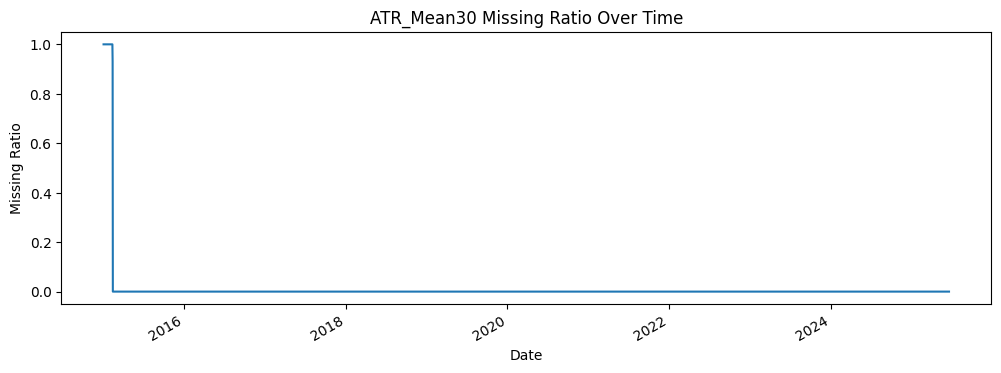

In [34]:
final_df['ATRMean30_missing'] = final_df['ATR_Mean30'].isnull()
final_df.groupby('Date')['ATRMean30_missing'].mean().plot(figsize=(12, 4), title='ATR_Mean30 Missing Ratio Over Time')
plt.ylabel('Missing Ratio')
plt.show()

final_df.drop(columns=['ATRMean30_missing'], inplace=True)

> Same as before, we will check the location of the nan values:

In [35]:
atrmean30_missing_by_ticker = final_df[final_df['ATR_Mean30'].isnull()]['Ticker'].value_counts()
print(atrmean30_missing_by_ticker.head(43))

Ticker
AAPL        29
AMGN        29
AMZN        29
AXP         29
BA          29
CAT         29
CL=F        29
CRM         29
CSCO        29
CVX         29
DIS         29
DX-Y.NYB    29
EURUSD=X    29
GBPUSD=X    29
GC=F        29
GS          29
HD          29
HON         29
IBM         29
JNJ         29
JPM         29
JPY=X       29
KO          29
MCD         29
MMM         29
MRK         29
MSFT        29
NKE         29
NVDA        29
PG          29
SHW         29
TRV         29
UNH         29
UUP         29
V           29
VZ          29
WMT         29
XLF         29
XLV         29
^DJI        29
^SPX        29
^TNX        29
^VIX        29
Name: count, dtype: int64


> Again, we find 29 missing values for the ATR_Mean30, which means there is also, a lagging problem. Since the ATR takes the mean of the last 30 days, while the RSI only does so for the last 14 days, we can check if there is an error with the indicator or it's natural that there are missing values.

In [36]:
mismatch = final_df[final_df['RSI'].isnull() != final_df['ATR_Mean30'].isnull()]
print(mismatch[['Date', 'RSI', 'ATR_Mean30']].head(700))

           Date        RSI  ATR_Mean30
531  2015-01-21  14.814133         NaN
532  2015-01-21  25.384166         NaN
540  2015-01-21  43.806440         NaN
562  2015-01-22  56.613463         NaN
563  2015-01-22  49.456040         NaN
...         ...        ...         ...
1245 2015-02-12  47.351654         NaN
1246 2015-02-12  57.128076         NaN
1247 2015-02-12  57.398263         NaN
1248 2015-02-12  65.561680         NaN
1249 2015-02-12  46.854147         NaN

[688 rows x 3 columns]


> After running the code above, we can see that the output contains 688 rows, which if you subtract from the total amount of null values (1247), it returns 559, which is the number of null RSI values.

> What this means is that, the RSI begins providing data after 14 days, while the ATR_Mean30 takes 30 days (duh) to start providing it.

> This is technically correct, so now the next question would be, what do we do with these missing values?:

> We can:
*   ***Drop the rows*** (not ideal, since it reduces the amount of data gathered, but is technically correct and better for the model)
*   Impute them (fill them with generated values based, on past, present and/or future predictions/mean)

> We'll continue the analysis to check if the condition applies to more of the remaining variables, and then, we'll proceed with the cleanup.



## CPI

In [37]:
cpi_missing = final_df['CPI'].isnull().sum()
cpi_total = len(final_df)
print(f"CPI: {cpi_missing} missing out of {cpi_total} ({cpi_missing/cpi_total:.2%})")

CPI: 1399 missing out of 113382 (1.23%)


> There is a total of 1502 missing values for the CPI, which constitutes a 1.33% of the total data. We will proceed to visualize where the null values are located:

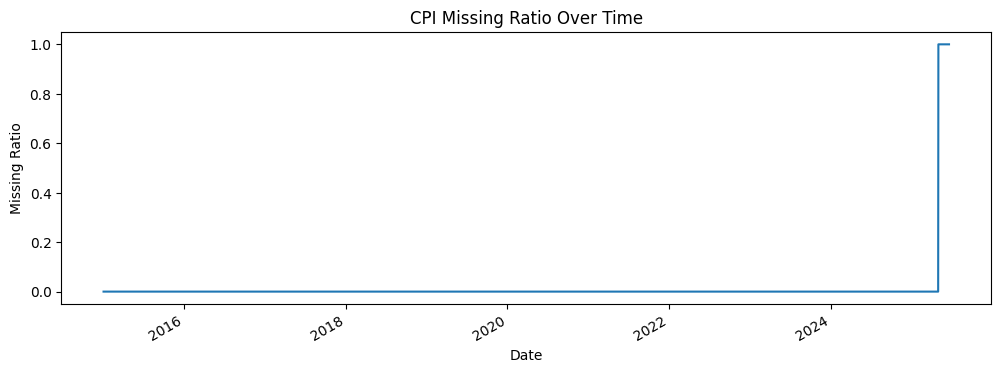

In [38]:
final_df['cpi_missing'] = final_df['CPI'].isnull()
final_df.groupby('Date')['cpi_missing'].mean().plot(figsize=(12, 4), title='CPI Missing Ratio Over Time')
plt.ylabel('Missing Ratio')
plt.show()

final_df.drop(columns=['cpi_missing'], inplace=True)

> In this particular case we have the CPI, which stands for Consumer Price Index. In simple terms, it measures inflation, so the higher it is, more inflation, higher prices.

> We can see that the null values are concentrated on the end of the dataset. The reason for this is that the CPI is a ***monthly*** release, which means the values for it stay the same, until the next month arrives.

> At the time of this writing (04/06/25), the next release is scheduled for 11/6. The last recorded CPI value dates (01/04/2025), ***as shown on the code below***.

> This will, inevitably, generate null values infinitely, since there is a month between each announcement.

In [39]:
last_valid_index = final_df['CPI'].last_valid_index()
final_df.loc[last_valid_index, ['Date', 'CPI']]

,111982
Date,2025-05-01 00:00:00
CPI,320.58


> We'll proceed to check where the missing values are located:

In [40]:
cpi_missing_by_ticker = final_df[final_df['CPI'].isnull()]['Ticker'].value_counts()
print(cpi_missing_by_ticker.head(43))

Ticker
JPY=X       35
GBPUSD=X    35
EURUSD=X    35
DX-Y.NYB    34
BA          33
CAT         33
CL=F        33
AXP         33
AAPL        33
AMGN        33
AMZN        33
DIS         33
CVX         33
CSCO        33
CRM         33
GS          33
HD          33
HON         33
GC=F        33
IBM         33
JNJ         33
JPM         33
KO          33
MMM         33
MRK         33
MSFT        33
NKE         33
VZ          33
NVDA        33
PG          33
SHW         33
TRV         33
UNH         33
UUP         33
V           33
^DJI        33
WMT         33
XLF         33
XLV         33
^TNX        33
^SPX        33
^VIX        33
MCD          6
Name: count, dtype: int64


> Why are there 35 missing values for the companies but for the currencies its only 34?

In [41]:
missing_cpi_dates = final_df[final_df['CPI'].isnull()]['Date'].unique()
print(len(missing_cpi_dates), missing_cpi_dates)

for date in missing_cpi_dates:
    tickers_on_date = final_df[final_df['Date'] == date]['Ticker'].unique()
    print(f"{date}: {len(tickers_on_date)} tickers")

35 <DatetimeArray>
['2025-05-02 00:00:00', '2025-05-05 00:00:00', '2025-05-06 00:00:00',
 '2025-05-07 00:00:00', '2025-05-08 00:00:00', '2025-05-09 00:00:00',
 '2025-05-12 00:00:00', '2025-05-13 00:00:00', '2025-05-14 00:00:00',
 '2025-05-15 00:00:00', '2025-05-16 00:00:00', '2025-05-19 00:00:00',
 '2025-05-20 00:00:00', '2025-05-21 00:00:00', '2025-05-22 00:00:00',
 '2025-05-23 00:00:00', '2025-05-26 00:00:00', '2025-05-27 00:00:00',
 '2025-05-28 00:00:00', '2025-05-29 00:00:00', '2025-05-30 00:00:00',
 '2025-06-02 00:00:00', '2025-06-03 00:00:00', '2025-06-04 00:00:00',
 '2025-06-05 00:00:00', '2025-06-06 00:00:00', '2025-06-09 00:00:00',
 '2025-06-10 00:00:00', '2025-06-11 00:00:00', '2025-06-12 00:00:00',
 '2025-06-13 00:00:00', '2025-06-16 00:00:00', '2025-06-17 00:00:00',
 '2025-06-18 00:00:00', '2025-06-19 00:00:00']
Length: 35, dtype: datetime64[ns]
2025-05-02 00:00:00: 43 tickers
2025-05-05 00:00:00: 43 tickers
2025-05-06 00:00:00: 43 tickers
2025-05-07 00:00:00: 43 tickers
20

> We can see that the values for the Currency Pairs is missing for that date, which means there is no information.

> We can, then, safely drop these rows to improve the model's accuracy.

## NFP

In [42]:
nfp_missing = final_df['NFP'].isnull().sum()
nfp_total = len(final_df)
print(f"NFP: {nfp_missing} missing out of {nfp_total} ({nfp_missing/nfp_total:.2%})")

NFP: 1399 missing out of 113382 (1.23%)


There is a total of 602 missing values for the NFP, which constitutes a 0.53% of the total data. We will proceed to visualize where the null values are located:

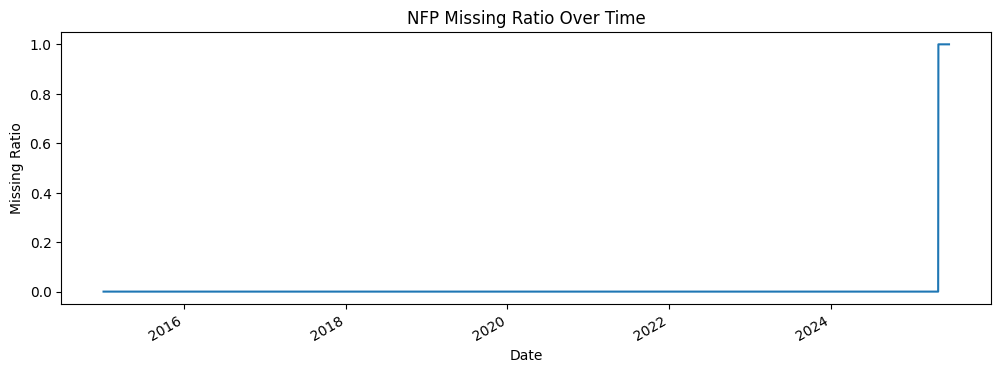

In [43]:
final_df['nfp_missing'] = final_df['NFP'].isnull()
final_df.groupby('Date')['nfp_missing'].mean().plot(figsize=(12, 4), title='NFP Missing Ratio Over Time')
plt.ylabel('Missing Ratio')
plt.show()

final_df.drop(columns=['nfp_missing'], inplace=True)

> In this particular case we have the NFP, which stands for the Non-Farm Payrolls. In simple terms, it measures inflation, so the higher it is, more inflation, higher prices.

> We can see that the null values are concentrated on the end of the dataset. The reason for this is that the NFP is a ***monthly*** release, which means the values for it stay the same, until the next month arrives.

> At the time of this writing (06/06/25), the next release is scheduled for 01/7. The last recorded CPI value dates (01/05/2025), ***as shown on the code below***.

> This will, inevitably, generate null values infinitely, since there is a month between each announcement.

In [44]:
last_valid_index = final_df['NFP'].last_valid_index()
final_df.loc[last_valid_index, ['Date', 'NFP']]

,111982
Date,2025-05-01 00:00:00
NFP,159561.0


> We'll proceed to check where the missing values are located:

In [45]:
nfp_missing_by_ticker = final_df[final_df['NFP'].isnull()]['Ticker'].value_counts()
print(nfp_missing_by_ticker.head(43))

Ticker
JPY=X       35
GBPUSD=X    35
EURUSD=X    35
DX-Y.NYB    34
BA          33
CAT         33
CL=F        33
AXP         33
AAPL        33
AMGN        33
AMZN        33
DIS         33
CVX         33
CSCO        33
CRM         33
GS          33
HD          33
HON         33
GC=F        33
IBM         33
JNJ         33
JPM         33
KO          33
MMM         33
MRK         33
MSFT        33
NKE         33
VZ          33
NVDA        33
PG          33
SHW         33
TRV         33
UNH         33
UUP         33
V           33
^DJI        33
WMT         33
XLF         33
XLV         33
^TNX        33
^SPX        33
^VIX        33
MCD          6
Name: count, dtype: int64


> We find there are 14 values missing for all the current tickers involved, nothing out of the ordinary here.

# Null / Duplicate Dropping

## Null dropping

> We will proceed to analyze the impact of dropping these variables to our model, and see if there is anything worth looking at.

In [46]:
affected_tickers = final_df[final_df[['RSI', 'ATR_Mean30', 'CPI', 'NFP']].isnull().any(axis=1)]['Ticker'].value_counts()
print(affected_tickers)

all_tickers = final_df['Ticker'].value_counts()
print(all_tickers)

null_impact_ratio = (affected_tickers / all_tickers).sort_values(ascending=False)
print(null_impact_ratio)

Ticker
JPY=X       64
GBPUSD=X    64
EURUSD=X    64
DX-Y.NYB    63
BA          62
CAT         62
CL=F        62
AXP         62
AAPL        62
AMGN        62
AMZN        62
DIS         62
CVX         62
CSCO        62
CRM         62
GS          62
HD          62
HON         62
GC=F        62
IBM         62
JNJ         62
JPM         62
KO          62
MMM         62
MRK         62
MSFT        62
NKE         62
VZ          62
NVDA        62
PG          62
SHW         62
TRV         62
UNH         62
UUP         62
V           62
^DJI        62
WMT         62
XLF         62
XLV         62
^TNX        62
^SPX        62
^VIX        62
MCD         35
Name: count, dtype: int64
Ticker
JPY=X       2724
GBPUSD=X    2724
EURUSD=X    2724
DX-Y.NYB    2632
BA          2631
CAT         2631
CRM         2631
AXP         2631
AAPL        2631
AMGN        2631
AMZN        2631
VZ          2631
DIS         2631
CSCO        2631
CVX         2631
HON         2631
HD          2631
IBM         2631
GS       

> Everything looks about right, dropping these rows will represent a 2% of total rows dropped for each ticker, which is completely fine since we are trading of performance with accuracy, integrity and proper funcionality.

> Would be nice to check the opposite course of action just for experimentation, but we won't do it here.

> We will proceed to drop all these NaN values.

In [47]:
cols_to_check = ['RSI', 'ATR_Mean30', 'CPI', 'NFP']
final_df_clean = final_df.dropna(subset=cols_to_check).copy()

In [48]:
# Check for my personal sanity
print(f"Original shape: {final_df.shape}")
print(f"After dropna: {final_df_clean.shape}")
print(f"Dropped rows: {final_df.shape[0] - final_df_clean.shape[0]}")
print("\nRemaining nulls:\n", final_df_clean[cols_to_check].isnull().sum())

Original shape: (113382, 23)
After dropna: (110736, 23)
Dropped rows: 2646

Remaining nulls:
 RSI           0
ATR_Mean30    0
CPI           0
NFP           0
dtype: int64


> We can see that we have dropped a total of 2749 rows, having cleaned the dataset and allowing us to proceed with the rest of the analysis.

## Numerical Univariate Analysis

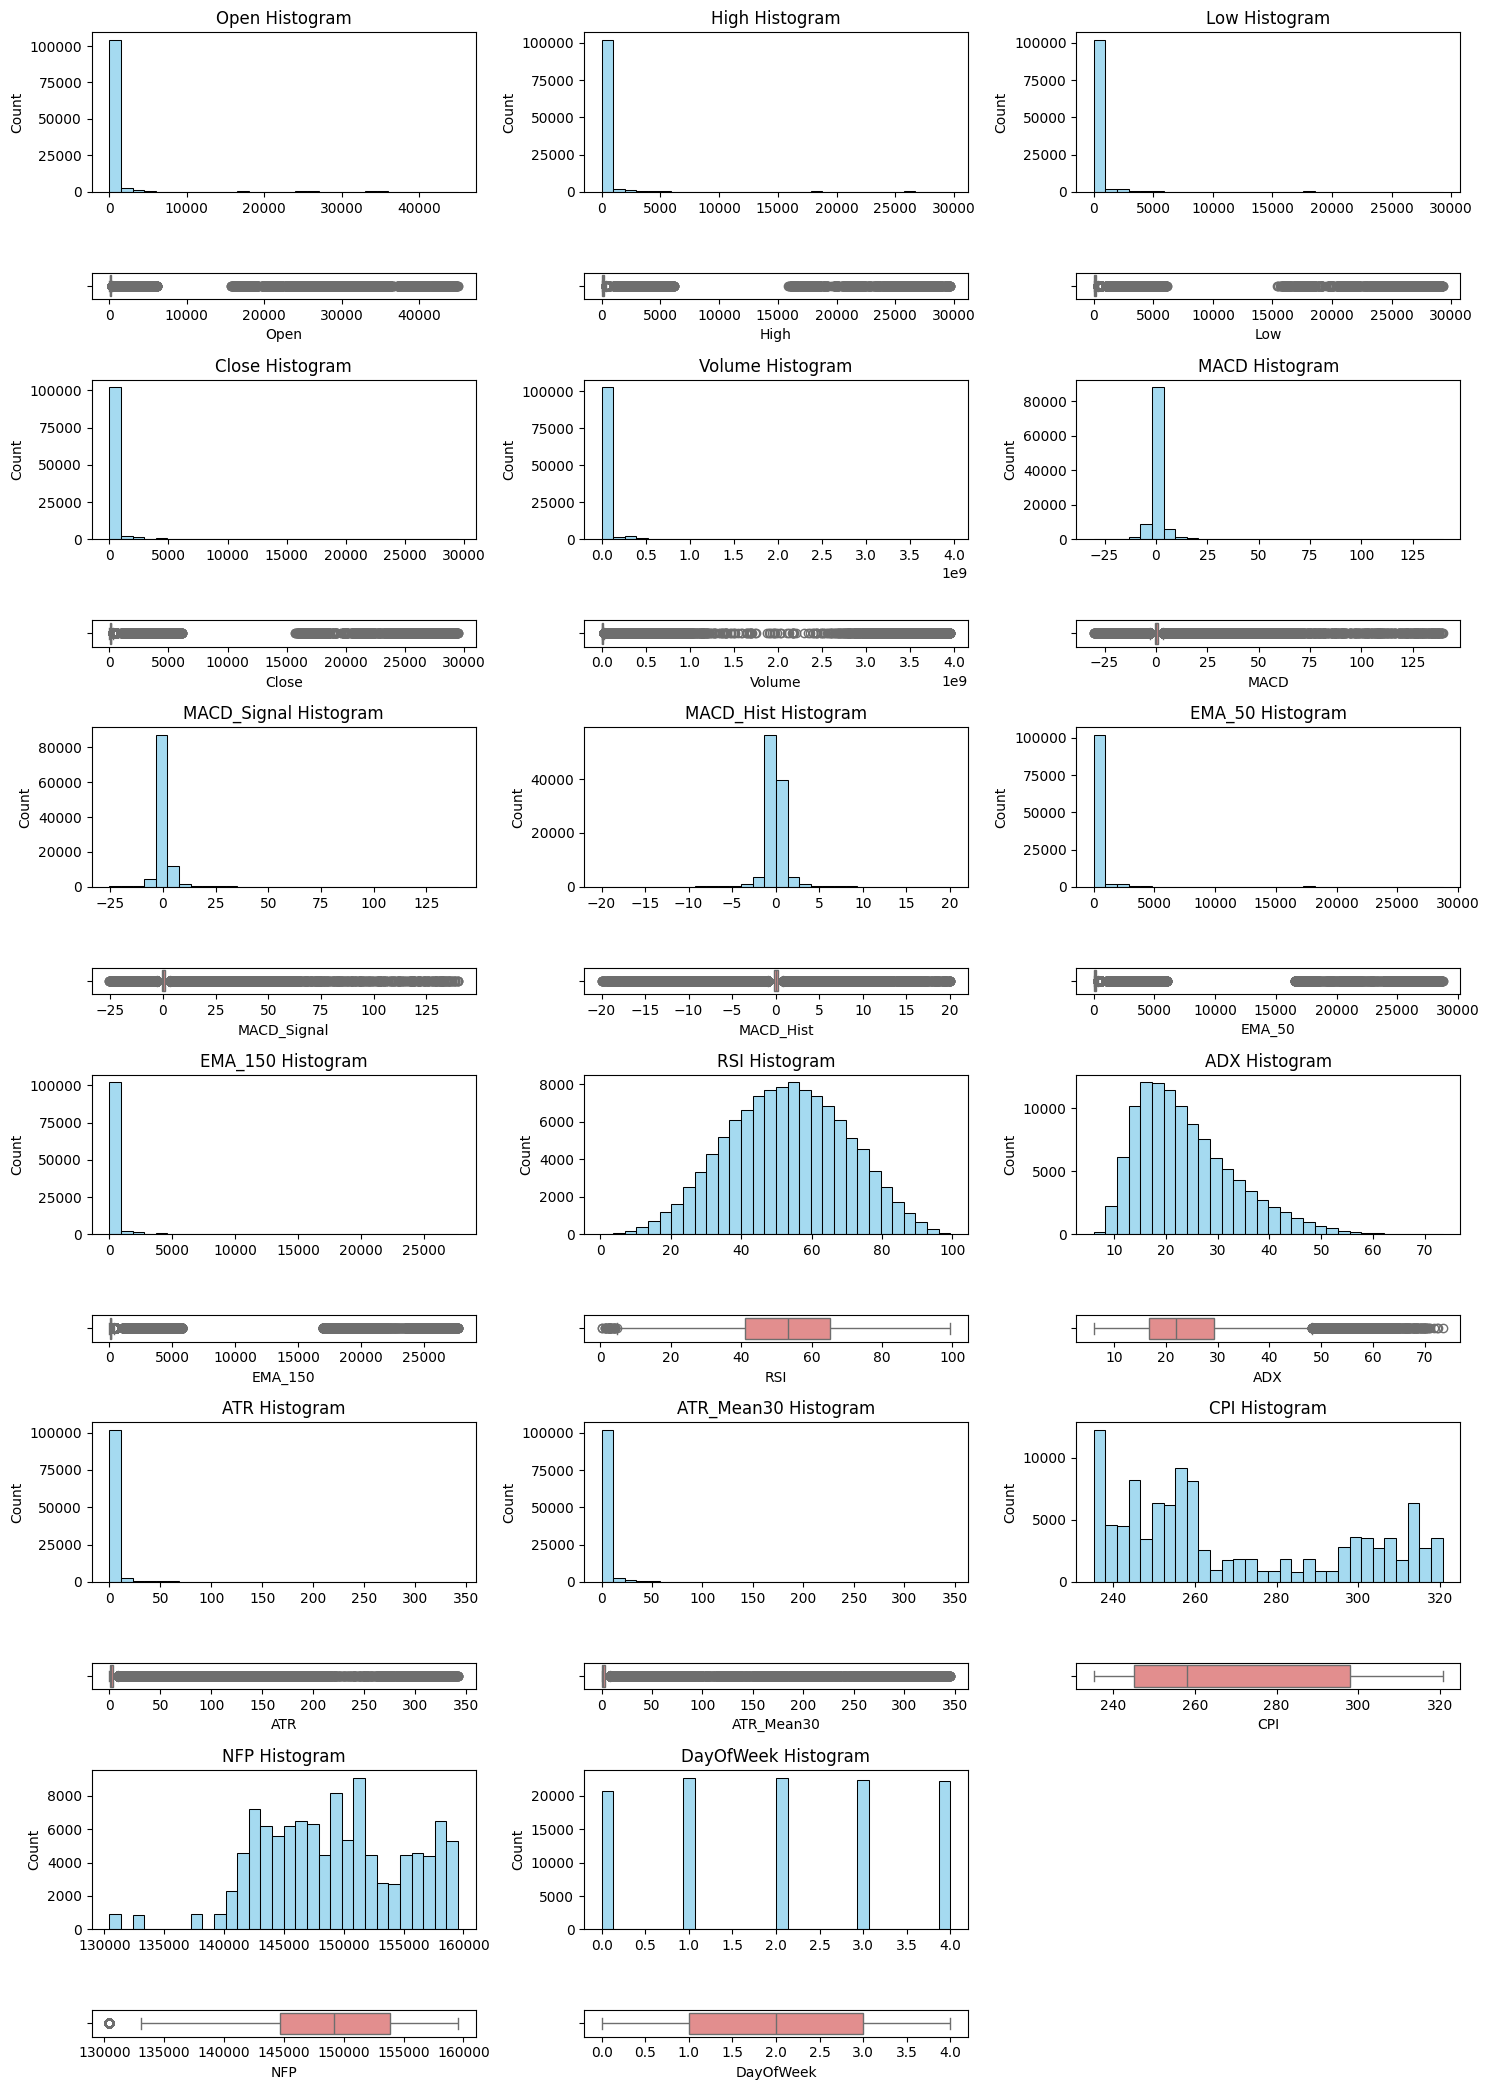

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Variables with long tails to clip
long_tail_vars = ['High', 'Low', 'Volume', 'Close', 'MACD', 'MACD_Signal', 'MACD_Hist',
                  'EMA_50', 'EMA_150', 'ATR', 'ATR_Mean30']

# Select all numeric columns
numeric_cols = final_df_clean.select_dtypes(include=np.number).columns
n_vars = len(numeric_cols)

# Layout: 3 variables per row (each variable uses 1 column with 2 rows of plots)
cols = 3
rows = math.ceil(n_vars / cols)

# Create figure
fig, axes = plt.subplots(rows * 2, cols, figsize=(cols * 5, rows * 3.5),
                         gridspec_kw={'height_ratios': [6, 1] * rows})

# Flatten axes to easily index
axes = np.array(axes).reshape(rows * 2, cols)

for i, col in enumerate(numeric_cols):
    row_idx = (i // cols) * 2  # double row index (for histogram and boxplot)
    col_idx = i % cols

    # Drop NaNs
    data = final_df_clean[col].dropna()

    # Clip if long-tailed
    if col in long_tail_vars:
        q_low, q_high = data.quantile([0.01, 0.99])
        data = data[(data >= q_low) & (data <= q_high)]

    # Plot histogram
    sns.histplot(ax=axes[row_idx, col_idx], x=data, bins=30, kde=False, color='skyblue')
    axes[row_idx, col_idx].set_title(f"{col} Histogram")
    axes[row_idx, col_idx].set(xlabel=None)

    # Plot boxplot
    sns.boxplot(ax=axes[row_idx + 1, col_idx], x=data, orient='h', color='lightcoral')
    axes[row_idx + 1, col_idx].set(xlabel=col)

# Remove any empty subplots
for j in range(i + 1, rows * cols):
    axes[(j // cols) * 2, j % cols].set_visible(False)
    axes[(j // cols) * 2 + 1, j % cols].set_visible(False)

plt.tight_layout()
plt.show()

### Explanation of numeric variables.

## Categorical Univariate Analysis

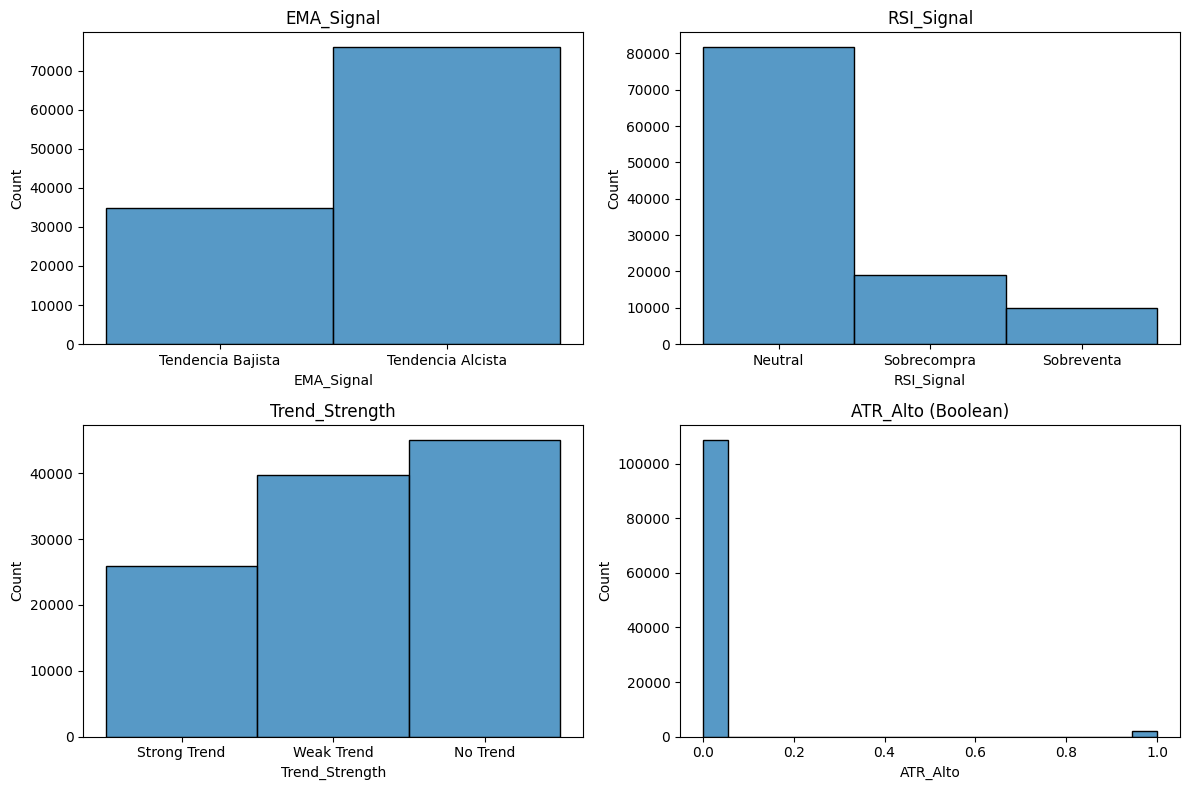

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplot grid: 2 rows × 2 columns (4 total plots)
fig, axis = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each categorical variable
sns.histplot(ax=axis[0, 0], data=final_df_clean, x="EMA_Signal").set_title("EMA_Signal")
sns.histplot(ax=axis[0, 1], data=final_df_clean, x="RSI_Signal").set_title("RSI_Signal")
sns.histplot(ax=axis[1, 0], data=final_df_clean, x="Trend_Strength").set_title("Trend_Strength")
sns.histplot(ax=axis[1, 1], data=final_df_clean, x="ATR_Alto").set_title("ATR_Alto (Boolean)")

# Tidy up layout
plt.tight_layout()
plt.show()


### Explanation of categorical variables

# Analysis of multivariate variables

/tmp/ipython-input-51-1695402507.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_corrs.values, y=sorted_corrs.index, palette="coolwarm")


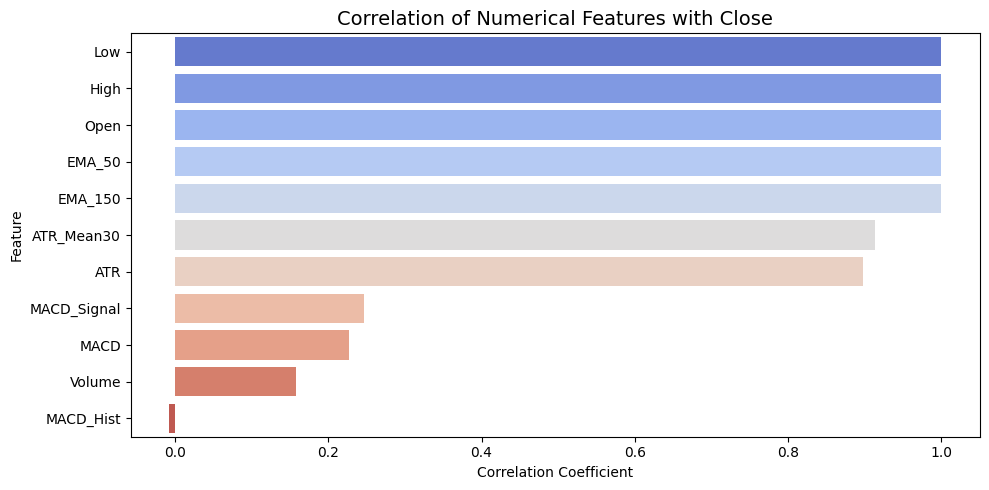

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your target variable
target = 'Close'  # You can change this to another valid numeric column like 'Open', 'High', etc.

# Define your numerical features (replace with actual column names from your dataset)
numerical_features = [
    'Open', 'High', 'Low', 'Volume', 'MACD', 'MACD_Signal', 'MACD_Hist',
    'EMA_50', 'EMA_150', 'ATR', 'ATR_Mean30'
]

# Ensure that all relevant columns are numeric
for col in numerical_features + [target]:
    final_df_clean[col] = pd.to_numeric(final_df_clean[col], errors='coerce')

# Drop rows with missing values in these columns
final_df_clean.dropna(subset=numerical_features + [target], inplace=True)

# Compute correlation matrix and extract correlations with the target
corr_matrix = final_df_clean[numerical_features + [target]].corr()
corrs = corr_matrix[target].drop(target)  # Drop self-correlation

# Sort the correlations
sorted_corrs = corrs.sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_corrs.values, y=sorted_corrs.index, palette="coolwarm")
plt.title(f'Correlation of Numerical Features with {target}', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# XGBoost


In [52]:
final_df_clean = final_df_clean.copy()
final_df_clean['target'] = (final_df_clean['Close'].shift(-1) > final_df_clean['Close']).astype(int)
final_df_clean = final_df_clean

In [53]:
final_df_clean = final_df_clean.set_index('Date')

display(final_df_clean)

,Ticker,Open,High,Low,Close,Volume,MACD,MACD_Signal,MACD_Hist,EMA_50,...,RSI_Signal,ADX,Trend_Strength,ATR,ATR_Mean30,ATR_Alto,CPI,NFP,DayOfWeek,target
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-12,EURUSD=X,1.130825,1.139819,1.130621,1.131196,0.000000e+00,-0.012640,-0.014427,0.001787,1.166403,...,Neutral,55.790886,Strong Trend,0.013763,0.008619,True,235.342,140827.0,3,1
2015-02-12,GBPUSD=X,1.523972,1.538793,1.521838,1.524274,0.000000e+00,-0.001666,-0.004838,0.003171,1.529313,...,Neutral,22.119449,Weak Trend,0.013638,0.007949,True,235.342,140827.0,3,1
2015-02-12,JPY=X,120.193001,120.369003,118.894997,120.169998,0.000000e+00,0.063946,-0.243084,0.307030,118.757645,...,Neutral,33.680226,Strong Trend,1.285520,0.734875,True,235.342,140827.0,3,0
2015-02-13,AAPL,28.387923,28.387923,28.024377,28.343317,2.170888e+08,0.910224,0.679676,0.230548,25.392286,...,Sobrecompra,29.631298,Weak Trend,0.612082,0.393575,True,235.342,140827.0,4,1
2015-02-13,AMGN,114.183787,114.325013,111.649186,114.079727,3.591400e+06,-0.911814,-1.012687,0.100873,115.614834,...,Neutral,14.682309,No Trend,3.144215,1.967975,True,235.342,140827.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-01,XLV,138.809998,139.110001,136.470001,136.639999,1.036320e+07,-1.168227,-1.753811,0.585584,140.738366,...,Neutral,29.618022,Weak Trend,3.078909,2.744770,False,320.580,159561.0,3,1
2025-05-01,^DJI,40918.039062,41099.519531,40705.628906,40752.960938,5.972700e+08,-255.002718,-507.886146,252.883428,41134.877348,...,Neutral,27.597243,Weak Trend,953.536512,924.258067,False,320.580,159561.0,3,0
2025-05-01,^SPX,5625.140137,5658.910156,5597.350098,5604.140137,4.935270e+09,-4.779121,-55.545052,50.765932,5571.577065,...,Neutral,25.923298,Weak Trend,145.004085,140.597754,False,320.580,159561.0,3,0


In [54]:
from sklearn.preprocessing import LabelEncoder
import joblib
import pandas as pd

# Codificar la columna 'ticker'
le = LabelEncoder()
final_df_clean['ticker_encoded'] = le.fit_transform(final_df_clean['Ticker'])

# Crear y guardar el mapeo de tickers
ticker_mapping = pd.DataFrame({
    'ticker': le.classes_,
    'ticker_encoded': range(len(le.classes_))
})
ticker_mapping.to_csv('ticker_mapping.csv', index=False)

# Guardar el codificador para uso futuro
joblib.dump(le, 'ticker_encoder.pkl')

# Verificar mapeo
print(ticker_mapping.head(42))
test_tickers = final_df_clean['ticker_encoded']

      ticker  ticker_encoded
0       AAPL               0
1       AMGN               1
2       AMZN               2
3        AXP               3
4         BA               4
5        CAT               5
6       CL=F               6
7        CRM               7
8       CSCO               8
9        CVX               9
10       DIS              10
11  DX-Y.NYB              11
12  EURUSD=X              12
13  GBPUSD=X              13
14      GC=F              14
15        GS              15
16        HD              16
17       HON              17
18       IBM              18
19       JNJ              19
20       JPM              20
21     JPY=X              21
22        KO              22
23       MCD              23
24       MMM              24
25       MRK              25
26      MSFT              26
27       NKE              27
28      NVDA              28
29        PG              29
30       SHW              30
31       TRV              31
32       UNH              32
33       UUP  

In [55]:
display(final_df_clean.tail(42))

,Ticker,Open,High,Low,Close,Volume,MACD,MACD_Signal,MACD_Hist,EMA_50,...,ADX,Trend_Strength,ATR,ATR_Mean30,ATR_Alto,CPI,NFP,DayOfWeek,target,ticker_encoded
Date,,,,,,,,,,,,,,,,,,,,,
2025-05-01,AMGN,284.525550,285.358188,279.599086,281.294098,2.942700e+06,-4.622549,-5.718888,1.096340,290.626094,...,28.768034,Weak Trend,8.894079,8.480653,False,320.58,159561.0,3,0,1
2025-05-01,AMZN,190.630005,191.809998,187.500000,190.199997,7.426600e+07,-1.928858,-4.227369,2.298511,193.063111,...,18.845813,No Trend,8.449389,8.391158,False,320.58,159561.0,3,1,2
2025-05-01,AXP,268.000000,272.660004,266.519989,268.540009,2.473800e+06,0.105898,-2.829001,2.934899,268.198050,...,15.634167,No Trend,10.544778,10.549741,False,320.58,159561.0,3,0,3
2025-05-01,BA,182.850006,184.750000,182.029999,182.889999,7.322900e+06,4.861745,1.737152,3.124593,168.021478,...,21.172594,Weak Trend,7.176115,7.621329,False,320.58,159561.0,3,1,4
2025-05-01,CAT,311.380005,318.890015,311.019989,313.959991,2.961000e+06,-3.583418,-7.670521,4.087102,319.427522,...,25.705597,Weak Trend,11.306093,11.177855,False,320.58,159561.0,3,0,5
2025-05-01,CL=F,58.160000,59.500000,56.389999,59.240002,3.642160e+05,-1.782150,-1.585526,-0.196624,65.445713,...,33.655822,Strong Trend,2.534160,2.285940,False,320.58,159561.0,3,1,6
2025-05-01,CRM,272.967128,274.165240,268.574100,268.903564,5.208900e+06,-1.965177,-5.798065,3.832888,274.042611,...,23.987326,Weak Trend,9.317976,9.902196,False,320.58,159561.0,3,0,7
2025-05-01,CSCO,57.779999,58.470001,57.680000,58.119999,1.642080e+07,-0.569101,-0.979407,0.410306,58.455638,...,26.878700,Weak Trend,1.508599,1.572805,False,320.58,159561.0,3,1,8
2025-05-01,CVX,133.790382,136.289935,133.493989,134.620270,1.019980e+07,-4.399786,-4.896896,0.497111,145.547322,...,28.412245,Weak Trend,4.243838,4.324058,False,320.58,159561.0,3,0,9


In [56]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Drop 'Ticker' if present
if 'Ticker' in final_df_clean.columns:
       final_df_clean = final_df_clean.drop(columns=['Ticker'])

# Encode categorical columns to numeric
categorical_cols = ['EMA_Signal', 'RSI_Signal', 'Trend_Strength']
for col in categorical_cols:
    if col in final_df_clean.columns:
        le = LabelEncoder()
        final_df_clean[col] = le.fit_transform(final_df_clean[col])

# Define features and target
X = final_df_clean.drop(columns=['target'])
y = final_df_clean['target']

# Time-based train/test split
split_index = int(len(final_df_clean) * 0.9)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Train XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:46:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.9254


In [57]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5569
           1       0.98      0.87      0.92      5505

    accuracy                           0.93     11074
   macro avg       0.93      0.93      0.93     11074
weighted avg       0.93      0.93      0.93     11074

[[5454  115]
 [ 711 4794]]
ROC AUC: 0.9837976837198394


In [58]:
display(final_df_clean)

,Open,High,Low,Close,Volume,MACD,MACD_Signal,MACD_Hist,EMA_50,EMA_150,...,ADX,Trend_Strength,ATR,ATR_Mean30,ATR_Alto,CPI,NFP,DayOfWeek,target,ticker_encoded
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-12,1.130825,1.139819,1.130621,1.131196,0.000000e+00,-0.012640,-0.014427,0.001787,1.166403,1.190414,...,55.790886,1,0.013763,0.008619,True,235.342,140827.0,3,1,12
2015-02-12,1.523972,1.538793,1.521838,1.524274,0.000000e+00,-0.001666,-0.004838,0.003171,1.529313,1.544471,...,22.119449,2,0.013638,0.007949,True,235.342,140827.0,3,1,13
2015-02-12,120.193001,120.369003,118.894997,120.169998,0.000000e+00,0.063946,-0.243084,0.307030,118.757645,119.351972,...,33.680226,1,1.285520,0.734875,True,235.342,140827.0,3,0,21
2015-02-13,28.387923,28.387923,28.024377,28.343317,2.170888e+08,0.910224,0.679676,0.230548,25.392286,24.709382,...,29.631298,2,0.612082,0.393575,True,235.342,140827.0,4,1,0
2015-02-13,114.183787,114.325013,111.649186,114.079727,3.591400e+06,-0.911814,-1.012687,0.100873,115.614834,117.079795,...,14.682309,0,3.144215,1.967975,True,235.342,140827.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-01,138.809998,139.110001,136.470001,136.639999,1.036320e+07,-1.168227,-1.753811,0.585584,140.738366,143.075950,...,29.618022,2,3.078909,2.744770,False,320.580,159561.0,3,1,38
2025-05-01,40918.039062,41099.519531,40705.628906,40752.960938,5.972700e+08,-255.002718,-507.886146,252.883428,41134.877348,41842.819232,...,27.597243,2,953.536512,924.258067,False,320.580,159561.0,3,0,39
2025-05-01,5625.140137,5658.910156,5597.350098,5604.140137,4.935270e+09,-4.779121,-55.545052,50.765932,5571.577065,5681.121216,...,25.923298,2,145.004085,140.597754,False,320.580,159561.0,3,0,40


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:46:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:46:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:46:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:46:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:46:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Time Series Cross-Validation Accuracy: [0.91482445 0.92706979 0.89932813 0.90534244 0.92073039]
Mean CV Accuracy: 0.9135


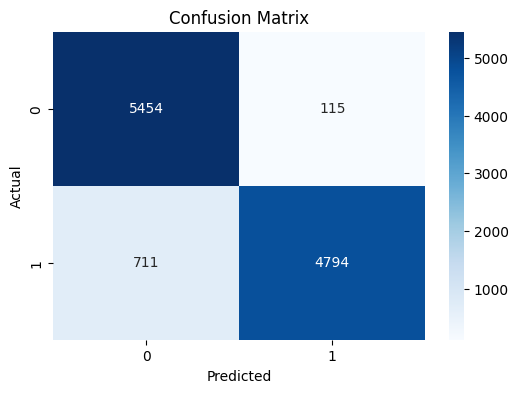

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5569
           1       0.98      0.87      0.92      5505

    accuracy                           0.93     11074
   macro avg       0.93      0.93      0.93     11074
weighted avg       0.93      0.93      0.93     11074

ROC AUC: 0.9838
False Negatives: 711
False Positives: 115


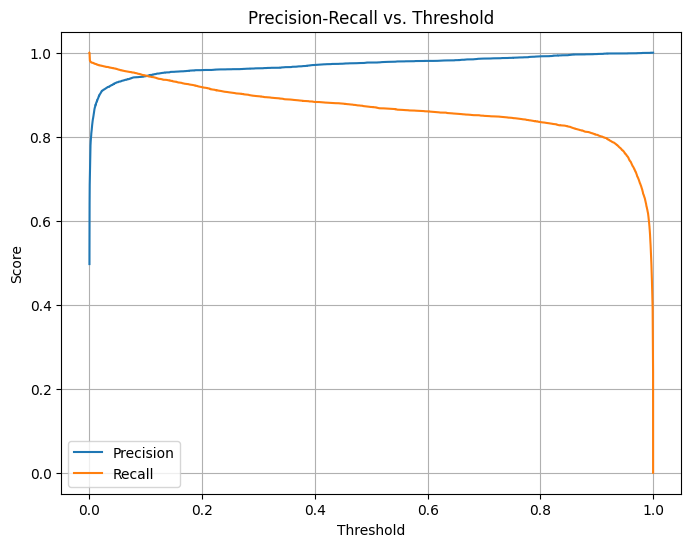

Classification Report (Custom Threshold):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5569
           1       0.98      0.87      0.92      5505

    accuracy                           0.93     11074
   macro avg       0.93      0.93      0.93     11074
weighted avg       0.93      0.93      0.93     11074



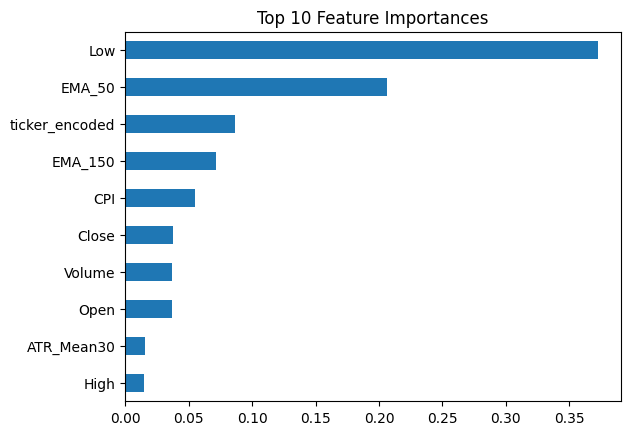

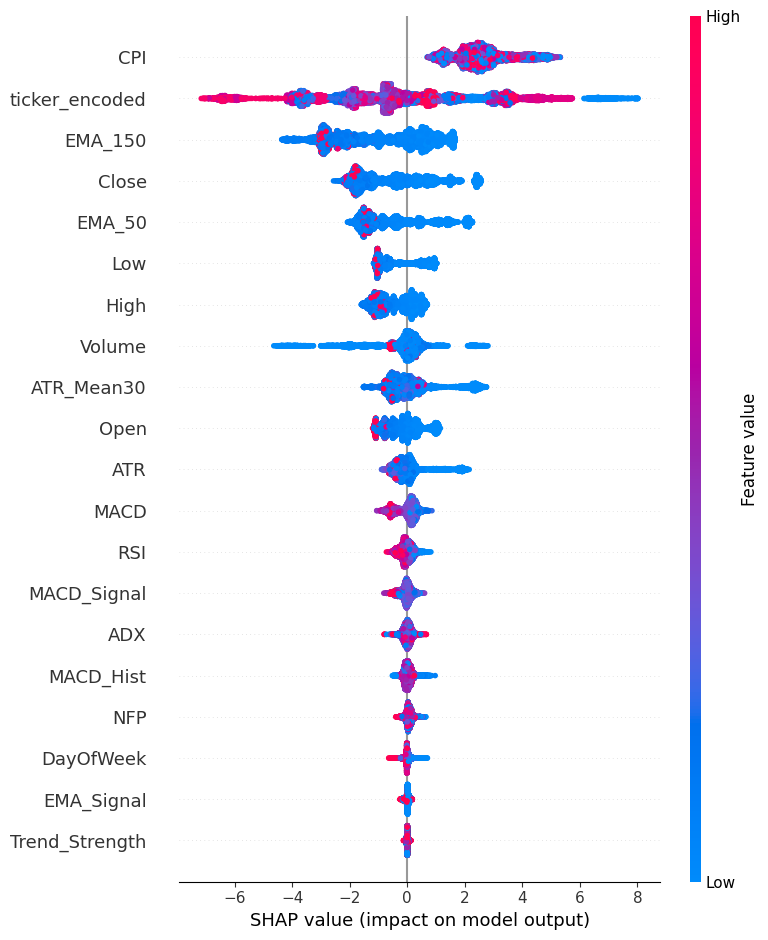

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.8595
Random Forest Time Series CV Accuracy: 0.8560
Logistic Regression Time Series CV Accuracy: 0.7744


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Time Series CV Accuracy: 0.9135


['final_time_series_model.pkl']

In [59]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve, accuracy_score
)
import shap
import joblib

# Assuming you have:
# model (already trained or initial)
# X (all features in time order)
# y (target in time order)

# -------------------------------
# 1. Cross-Validation with TimeSeriesSplit
# -------------------------------
from sklearn.model_selection import cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

cv_scores = cross_val_score(model, X, y, cv=tscv, scoring='accuracy')

print(f"Time Series Cross-Validation Accuracy: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# -------------------------------
# 2. Error Analysis
# -------------------------------
# Assuming you already have the final train/test split:
# X_train, X_test, y_train, y_test (keep chronological order)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Identify misclassifications
false_negatives = X_test[(y_test == 1) & (y_pred == 0)]
false_positives = X_test[(y_test == 0) & (y_pred == 1)]

print(f"False Negatives: {false_negatives.shape[0]}")
print(f"False Positives: {false_positives.shape[0]}")

# -------------------------------
# 3. Threshold Tuning
# -------------------------------
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs. Threshold')
plt.legend()
plt.grid()
plt.show()

# Example: Apply custom threshold
custom_threshold = 0.5
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print("Classification Report (Custom Threshold):")
print(classification_report(y_test, y_pred_custom))

# -------------------------------
# 4. Feature Importance / SHAP
# -------------------------------
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X_test.columns)
    feature_importances.sort_values(ascending=False).head(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

# SHAP Explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

# -------------------------------
# 5. Hyperparameter Tuning (TimeSeriesSplit)
# -------------------------------
# Example: Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=tscv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# -------------------------------
# 6. Model Comparison (TimeSeriesSplit)
# -------------------------------
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = {
    'Random Forest': RandomForestClassifier(**grid_search.best_params_),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, clf in models.items():
    scores = cross_val_score(clf, X, y, cv=tscv, scoring='accuracy')
    print(f'{name} Time Series CV Accuracy: {np.mean(scores):.4f}')

# -------------------------------
# 7. Business Context Alignment
# -------------------------------
# Adjust decision threshold based on cost of false positives vs. false negatives
# Use threshold tuning plot to select the ideal threshold for your business case.

# -------------------------------
# 8. (Optional) Deployment Preparation
# -------------------------------
# Save final model
joblib.dump(model, 'final_time_series_model.pkl')

# Load model later
# model = joblib.load(+)


In [60]:
print(X_test.columns.tolist())


['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'MACD_Signal', 'MACD_Hist', 'EMA_50', 'EMA_150', 'EMA_Signal', 'RSI', 'RSI_Signal', 'ADX', 'Trend_Strength', 'ATR', 'ATR_Mean30', 'ATR_Alto', 'CPI', 'NFP', 'DayOfWeek', 'ticker_encoded']


In [61]:
tickers = X_test['ticker_encoded'].unique()

for ticker in tickers:
    mask = X_test['ticker_encoded'] == ticker
    y_true = y_test[mask]
    y_pred_ticker = y_pred[mask]
    y_proba_ticker = y_proba[mask]

    print(f"Ticker: {ticker}")
    print(classification_report(y_true, y_pred_ticker))
    print(f"ROC AUC: {roc_auc_score(y_true, y_proba_ticker):.4f}")


Ticker: 4
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       257

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

ROC AUC: nan
Ticker: 5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

ROC AUC: nan
Ticker: 6
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       258

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258

ROC AUC: nan
Ticker: 7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist

Ticker: 24
              precision    recall  f1-score   support

           0       1.00      0.47      0.64       191
           1       0.39      1.00      0.56        66

    accuracy                           0.60       257
   macro avg       0.70      0.73      0.60       257
weighted avg       0.84      0.60      0.62       257

ROC AUC: 0.9929
Ticker: 25
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       257

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

ROC AUC: nan
Ticker: 26
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

ROC AUC: nan
Ticker: 27
              precision    recall  f1-sco

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist

In [62]:
# Obtener los últimos datos disponibles (17/06/2025)
last_date = final_df_clean.index.max()
last_day_data = final_df_clean[final_df_clean.index == last_date].copy()

print(f"Datos disponibles para predicción - Fecha: {last_date.strftime('%Y-%m-%d')}")
print(f"Número de tickers encontrados: {len(last_day_data)}")

# Verificar si tenemos datos para todos los tickers
if len(last_day_data) < 42:
    print(f"Advertencia: Solo se encontraron datos para {len(last_day_data)} de 42 tickers")

# Preparar datos para predicción
if 'target' in last_day_data.columns:
    features_to_predict = last_day_data.drop(columns=['target'])
else:
    features_to_predict = last_day_data

# Realizar predicciones
predictions = model.predict(features_to_predict)
prediction_proba = model.predict_proba(features_to_predict)[:, 1]  # Probabilidad de clase positiva

# Crear DataFrame con resultados
prediction_results = pd.DataFrame({
    'Date': features_to_predict.index,
    'ticker_encoded': features_to_predict['ticker_encoded'],
    'Prediction': predictions,
    'Probability_Up': prediction_proba
})

# Mapear códigos de ticker a nombres reales
ticker_mapping = pd.read_csv('ticker_mapping.csv')
prediction_results = prediction_results.merge(
    ticker_mapping,
    on='ticker_encoded',
    how='left'
)

# Ajustar fecha de predicción (día siguiente)
prediction_results['Prediction_Date'] = prediction_results['Date'] + pd.Timedelta(days=1)

# Formatear resultados
final_predictions = prediction_results[[
    'Prediction_Date', 'ticker', 'Prediction', 'Probability_Up'
]].sort_values('ticker').reset_index(drop=True)

# Agregar significado a la predicción
final_predictions['Direction'] = final_predictions['Prediction'].map({
    0: 'DOWN (Precio baja)',
    1: 'UP (Precio sube)'
})

print("\n" + "="*60)
print(f"PREDICCIONES PARA EL 18/06/2025 - {len(final_predictions)} TICKERS")
print("="*60)

# Mostrar resultados formateados
pd.set_option('display.max_rows', None)
display(final_predictions[['Prediction_Date', 'ticker', 'Direction', 'Probability_Up']])
pd.reset_option('display.max_rows')

# Opcional: Guardar resultados en CSV
final_predictions.to_csv('predicciones_18_06_2025.csv', index=False)
print("Predicciones guardadas en 'predicciones_18_06_2025.csv'")


Datos disponibles para predicción - Fecha: 2025-05-01
Número de tickers encontrados: 43

PREDICCIONES PARA EL 18/06/2025 - 43 TICKERS


,Prediction_Date,ticker,Direction,Probability_Up
0,2025-05-02,AAPL,UP (Precio sube),0.787404
1,2025-05-02,AMGN,DOWN (Precio baja),0.001060
2,2025-05-02,AMZN,UP (Precio sube),0.890134
3,2025-05-02,AXP,DOWN (Precio baja),0.003079
4,2025-05-02,BA,UP (Precio sube),0.998056
5,2025-05-02,CAT,DOWN (Precio baja),0.000019
6,2025-05-02,CL=F,UP (Precio sube),0.999970
7,2025-05-02,CRM,DOWN (Precio baja),0.000089
8,2025-05-02,CSCO,UP (Precio sube),0.999959
9,2025-05-02,CVX,DOWN (Precio baja),0.001592


Predicciones guardadas en 'predicciones_18_06_2025.csv'
